In [1]:
pip install spectral

     |████████████████████████████████| 184 kB 23.5 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=68d49dee3c679ae66c4ac9132cf49fa5cc3712f5a0864cecf712897d9a117a41
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid');
import pandas as pd 
from sklearn.decomposition import PCA


In [4]:
from spectral import *
img = open_image('/content/gdrive/MyDrive/92AV3C.lan')


**DISPLAYING IMAGE**

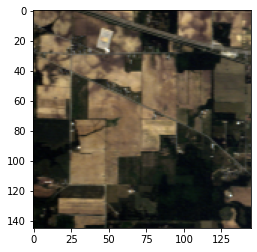

In [5]:
view = imshow(img, (29, 19, 9))

**SHAPE OF ORIGINAL IMAGE DATA**

In [6]:
img.shape 

(145, 145, 220)

**LOADING IMAGE DATA AS ARRAY**

In [7]:
imData = img.load()
print(imData.info())

	# Rows:            145
	# Samples:         145
	# Bands:           220
	Data format:   float32


**CONVERTING THE IMAGE FILE IN CSV FILE**

In [9]:
carr = imData.reshape(-1, imData.shape[2]) 

df = pd.DataFrame(data = carr)
df.columns= [f'band{i}' for i in range(1, imData.shape[2])]+['class']
df.to_csv('Dataset.csv')

In [10]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204,band205,band206,band207,band208,band209,band210,band211,band212,band213,band214,band215,band216,band217,band218,band219,class
0,3172.0,4142.0,4506.0,4279.0,4782.0,5048.0,5213.0,5106.0,5053.0,4750.0,4816.0,4769.0,4610.0,4805.0,4828.0,4861.0,4767.0,4624.0,4549.0,4463.0,4462.0,4446.0,4445.0,4336.0,4381.0,4319.0,4207.0,4305.0,4311.0,3991.0,4168.0,3942.0,4061.0,4365.0,4318.0,4252.0,4869.0,5284.0,5055.0,3591.0,...,1396.0,1381.0,1396.0,1381.0,1353.0,1346.0,1341.0,1332.0,1324.0,1310.0,1318.0,1330.0,1310.0,1292.0,1280.0,1275.0,1266.0,1264.0,1233.0,1241.0,1232.0,1215.0,1215.0,1187.0,1168.0,1171.0,1150.0,1134.0,1123.0,1135.0,1094.0,1090.0,1112.0,1090.0,1062.0,1069.0,1057.0,1020.0,1020.0,1005.0
1,3348.0,4266.0,4502.0,4426.0,4853.0,5249.0,5352.0,5353.0,5347.0,5065.0,5141.0,5100.0,4994.0,5172.0,5290.0,5289.0,5217.0,5053.0,5033.0,4939.0,4931.0,4941.0,4902.0,4824.0,4859.0,4805.0,4698.0,4794.0,4806.0,4452.0,4628.0,4433.0,4643.0,4967.0,4853.0,4760.0,5449.0,5768.0,5684.0,3987.0,...,1421.0,1415.0,1428.0,1415.0,1379.0,1370.0,1360.0,1353.0,1352.0,1336.0,1346.0,1351.0,1330.0,1315.0,1305.0,1292.0,1282.0,1286.0,1259.0,1259.0,1250.0,1229.0,1232.0,1195.0,1177.0,1184.0,1153.0,1137.0,1138.0,1137.0,1108.0,1104.0,1117.0,1091.0,1079.0,1085.0,1064.0,1029.0,1020.0,1000.0
2,3687.0,4266.0,4421.0,4498.0,5019.0,5293.0,5438.0,5427.0,5383.0,5132.0,5227.0,5172.0,5097.0,5313.0,5411.0,5412.0,5341.0,5191.0,5140.0,5069.0,5110.0,5119.0,5046.0,4981.0,5023.0,4987.0,4862.0,4965.0,4992.0,4595.0,4756.0,4529.0,4801.0,5077.0,4983.0,4868.0,5515.0,5972.0,5913.0,4027.0,...,1446.0,1440.0,1443.0,1425.0,1390.0,1379.0,1376.0,1363.0,1355.0,1347.0,1361.0,1356.0,1341.0,1330.0,1321.0,1304.0,1290.0,1289.0,1263.0,1269.0,1261.0,1245.0,1241.0,1214.0,1185.0,1188.0,1156.0,1147.0,1149.0,1144.0,1111.0,1114.0,1114.0,1100.0,1065.0,1092.0,1061.0,1030.0,1016.0,1009.0
3,3517.0,4258.0,4603.0,4493.0,4958.0,5234.0,5417.0,5355.0,5349.0,5096.0,5147.0,5078.0,5040.0,5237.0,5321.0,5344.0,5255.0,5121.0,5035.0,4956.0,4994.0,4980.0,4905.0,4857.0,4900.0,4831.0,4720.0,4848.0,4847.0,4484.0,4613.0,4402.0,4674.0,4966.0,4848.0,4776.0,5473.0,5894.0,5789.0,4086.0,...,1432.0,1427.0,1426.0,1416.0,1386.0,1374.0,1375.0,1359.0,1343.0,1343.0,1354.0,1351.0,1333.0,1329.0,1313.0,1296.0,1280.0,1281.0,1251.0,1255.0,1253.0,1238.0,1223.0,1207.0,1188.0,1188.0,1154.0,1143.0,1144.0,1146.0,1122.0,1108.0,1109.0,1109.0,1071.0,1088.0,1060.0,1030.0,1006.0,1005.0
4,3514.0,4018.0,4675.0,4417.0,4886.0,5117.0,5215.0,5096.0,5098.0,4834.0,4853.0,4857.0,4734.0,4879.0,4976.0,4958.0,4885.0,4754.0,4647.0,4532.0,4586.0,4591.0,4492.0,4453.0,4497.0,4398.0,4297.0,4408.0,4401.0,4102.0,4227.0,4075.0,4264.0,4529.0,4490.0,4438.0,5001.0,5378.0,5321.0,3779.0,...,1401.0,1397.0,1395.0,1390.0,1368.0,1349.0,1354.0,1340.0,1330.0,1324.0,1336.0,1332.0,1320.0,1307.0,1287.0,1283.0,1267.0,1265.0,1239.0,1240.0,1239.0,1229.0,1212.0,1202.0,1178.0,1178.0,1143.0,1135.0,1138.0,1135.0,1110.0,1107.0,1112.0,1094.0,1072.0,1087.0,1052.0,1034.0,1019.0,1019.0


**CALCULATING VARIANCE**

Varience of new dataset:
[2.53831000e+07 8.62968500e+06 6.06428438e+05 1.28537484e+05
 6.92757188e+04 5.32713594e+04 2.59841367e+04 1.36179150e+04
 1.26709023e+04 8.33605957e+03]


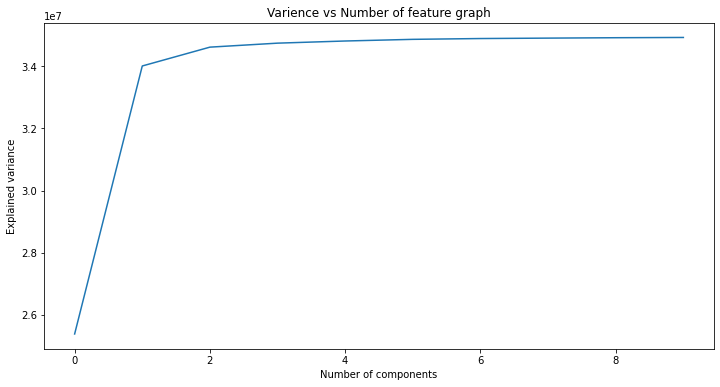

In [11]:
pca = PCA(n_components = 10)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

#Calculating variance
ev = pca.explained_variance_

print("Varience of new dataset:")
print(ev)

#Ploting varience
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.title('Varience vs Number of feature graph')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')


plt.show()

**CALCULATING CUMULATIVE VARIANCE**

Cumulative varience of new dataset:
[72.485    97.128    98.86     99.227    99.424995 99.576996 99.65099
 99.689995 99.726    99.75    ]


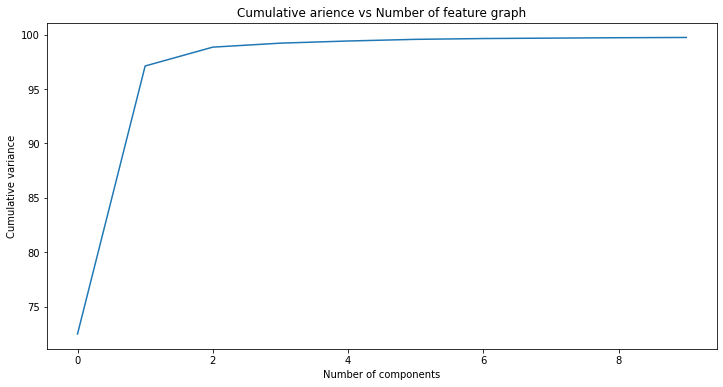

In [12]:
#Calculating cumulative variance
var_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(var_ratio, decimals=5)*100)

print("Cumulative varience of new dataset:")
print(cum_var)

#Ploting cumulative varience
plt.figure(figsize=(12, 6))
plt.plot(cum_var)
plt.title('Cumulative arience vs Number of feature graph')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')


plt.show()

**DISPLAYING 1ST 10 PCA IMAGES**

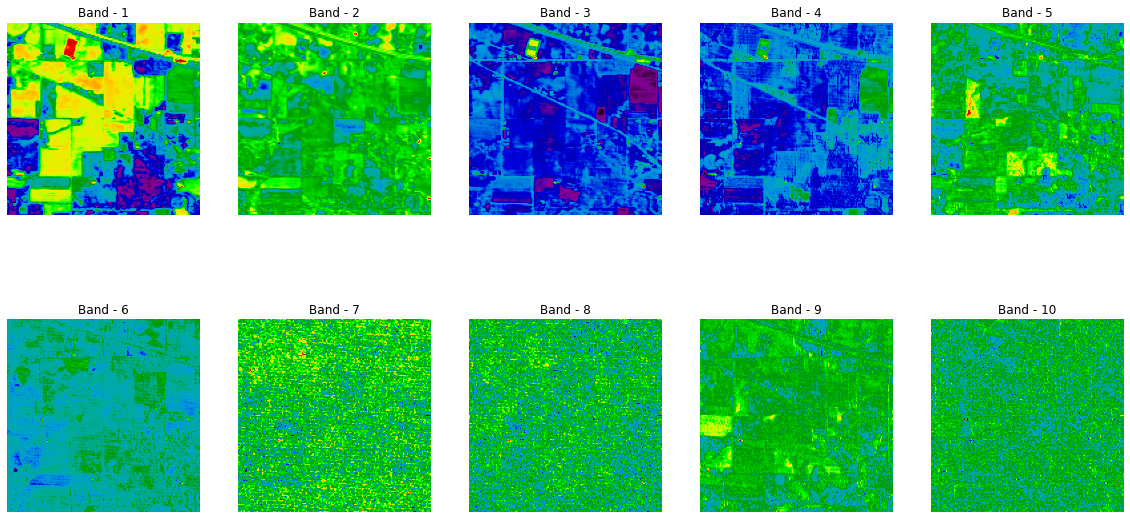

In [37]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 10+1):
    fig.add_subplot(2,5, i)
    plt.imshow(q.loc[:, i-1].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')
